<a href="https://colab.research.google.com/github/arafiardnsyh/toyota-stock-analysis/blob/main/toyota_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn yfinance

from google.colab import files
uploaded = files.upload()  # Upload CSV file


Saving Toyota_Data.csv to Toyota_Data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Toyota_Data.csv')

# Display the first few rows
print(df.head())
print(df.info())


         Date  Adj Close     Close      High       Low      Open  Volume
0  1980-03-17   2.296798  3.291227  3.344743  3.291227  0.000000   41109
1  1980-03-18   2.306134  3.304606  3.358122  3.304606  0.000000    9343
2  1980-03-19   2.306134  3.304606  3.304606  3.304606  3.304606       0
3  1980-03-20   2.306134  3.304606  3.358122  3.304606  0.000000   10277
4  1980-03-21   2.362154  3.384880  3.438396  3.384880  0.000000    8409
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11291 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11291 non-null  float64
 4   Low        11291 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.6+ KB
None


In [ ]:
print(df.describe()) #summarize data


          Adj Close         Close          High           Low          Open  \
count  11291.000000  11291.000000  11291.000000  11291.000000  11291.000000   
mean      63.586275     72.057776     72.478879     71.646418     67.955424   
std       52.272225     51.295776     51.552662     50.976716     55.851523   
min        2.259452      3.237711      3.237711      3.237711      0.000000   
25%       19.224636     27.548208     27.735613     27.548208      0.000000   
50%       50.583900     66.040001     66.650002     65.440002     66.000000   
75%      104.705669    114.295002    114.895000    113.625000    114.294998   
max      254.770004    254.770004    255.229996    253.589996    255.000000   

             Volume  
count  1.129100e+04  
mean   2.146604e+05  
std    3.874256e+05  
min    0.000000e+00  
25%    1.350000e+04  
50%    9.100000e+04  
75%    2.923000e+05  
max    1.858270e+07  


In [ ]:
#Check for missing values
print(df.isnull().sum())


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


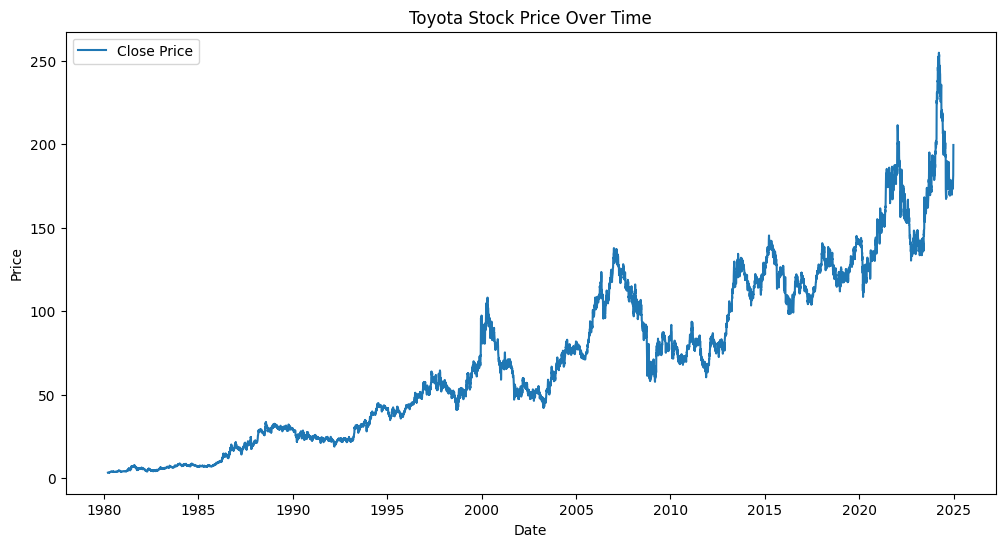

In [ ]:
#Question 1: Trend Analysis
#Plot stock price trends
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Toyota Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


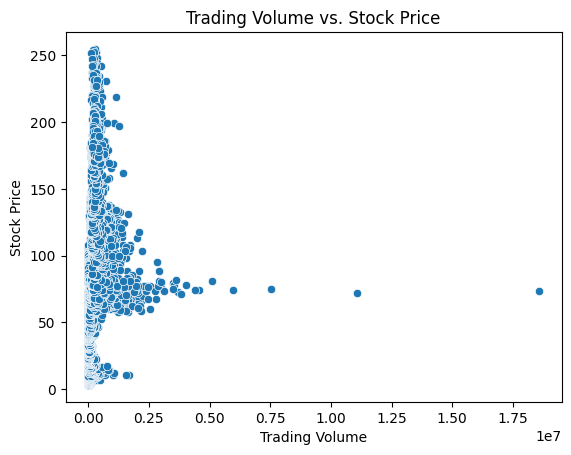

In [ ]:
#Question 2: Correlation with Trading Volume
#Scatterplot
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Trading Volume vs. Stock Price')
plt.xlabel('Trading Volume')
plt.ylabel('Stock Price')
plt.show()


In [ ]:
#Correlation coefficient
correlation = df['Volume'].corr(df['Close'])
print(f"Correlation between Volume and Close Price: {correlation}")


Correlation between Volume and Close Price: 0.30175451969351236


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


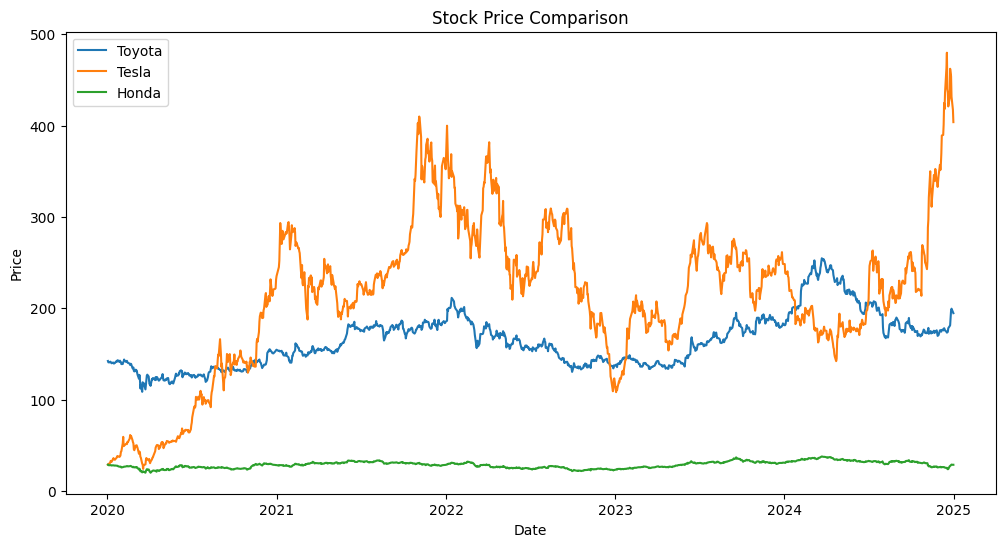

In [ ]:
#Question 3: Comparison with Competitors
#Use the yfinance library to fetch competitor data
import yfinance as yf

# Fetch Toyota, Tesla, and Honda stock data
toyota = yf.download('TM', start='2020-01-01', end='2025-01-01')
tesla = yf.download('TSLA', start='2020-01-01', end='2025-01-01')
honda = yf.download('HMC', start='2020-01-01', end='2025-01-01')

# Compare closing prices
plt.figure(figsize=(12, 6))
plt.plot(toyota['Close'], label='Toyota')
plt.plot(tesla['Close'], label='Tesla')
plt.plot(honda['Close'], label='Honda')
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
